In [3]:
import seaborn as sns
full_palette = sns.color_palette()
full_palette

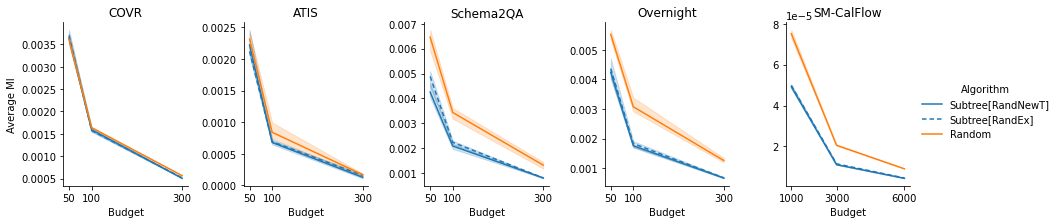

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
datasets = ['covr', 'atis', 'thingtalk', 'overnight', 'smcalflow']
dfs = {k: pd.read_pickle(f'../../experiments/outputs/ds_info_fixed/{k}.pkl').query('ex_sel != "mf_new_template"') for k in datasets}
ds_name_map = {'covr': 'COVR', 'atis': 'ATIS', 'thingtalk': 'Schema2QA', 'overnight': 'Overnight', 'smcalflow': 'SM-CalFlow', 'smcalflow-uncommon': 'SM-CalFlow'}
algo_index = {
    'Random': 0,
    'Bigram': 1,
    'Bigram[Freq]': 2,
    'Subtree[RandEx]': 3,
    'Subtree[RandNewT]': 4,
    'Subtree[FreqNewT]': 5,
    'Template}': 6,
    'Template[Freq]': 7,
}
# metric_name = 'NCMI'
metric_name = 'Average MI'
for i, (dataset, df) in enumerate(dfs.items()):
    df['Dataset'] = ds_name_map[dataset]
    # df['split_type'] = df.split_type.apply(lambda t: {'iid': 'IID', 'subtree': 'Subtree', 'template/0.2': 'Template', 'template/0.5': 'Template'}[t])
    # df['Split Type'] = df['split_type']
    df.rename_axis()
    def algo_name(r):
        if r.compound:
            return f'Subtree[RandEx]' if r.ex_sel == 'random' else f'Subtree[RandNewT]'
        else: return f'Random'
    df['Algorithm'] = df.apply(algo_name, axis=1)
    df.rename(columns={'n_trn': 'Budget', 'ncmi2': metric_name}, inplace=True)
fulldf = pd.concat(list(dfs.values()))
palette = {
    'Subtree[RandNewT]': ['black', full_palette[0]][1],
    'Subtree[RandEx]': ['black', full_palette[0]][1],
    'Random': full_palette[1],
    # 'Random': 'black'
}
dashes = {
    'Subtree[RandNewT]': '',
    'Subtree[RandEx]': (3,2),
    'Random': '',
}
g = sns.relplot(
    data=fulldf, x='Budget', y=metric_name, hue='Algorithm', style='Algorithm', col='Dataset', 
    hue_order=['Subtree[RandNewT]', 'Subtree[RandEx]', 'Random'], kind='line', 
    palette=palette, dashes=dashes, facet_kws=dict(sharex=False, sharey=False),
    height=3, aspect=0.85)
for i, (dataset, df) in enumerate(dfs.items()):
    n_trn_l = df.Budget.unique()
    g.axes[0, i].set_xticks(n_trn_l)
    g.axes[0, i].set_title(ds_name_map[dataset])
    # g.axes[0, i].set_xscale('log')

g.fig.savefig('figures/corr.svg', bbox_inches='tight', dpi=1200)